# Homework 10: Cleaning data with Regular Expressions

Time to use regular expressions!

# Hints and notes

### Opening files in subdirectories

Notice that this notebook might be **homework/**, but!!! the csvs and text files might be in **homework/scraped/** or **/homework/scraped/minutes_pdfs** or **/homework/pdfs/**. To open a file in a subdirectory, instead of having the filename be `"file.csv"` you'll just use `"some/subfolder/file.csv"`

### Opening text files

This will open up a file, read it in and show you the first 500 characters.

```python
contents = open("your-filename.txt").read()
contents[0:500]
```

> You might need `open("your-filename.txt", encoding="utf8").read()`

### Using regex

For some dumb reason you need to put `r` in front of the string you use when you're talking about regex. Just plain `"(\d\d\d)"` will usually work, but *sometimes* it won't and you'll need `r"(\d\d\d)`. It's best to just use the `r` all of the time, if you can remember!

### Using `.str.extract`

When you use `.str.extract`, you're always going to **capture one thing** and save it to a new column. You need to wrap the things you're interested in with parenthesis `(` `)`.

```python
df['phone_number'] = df['old_column'].str.extract(r"My phone number is (\d\d\d-\d\d\d-\d\d\d\d)")
```

### Setting pandas options

Pandas has a lot of options, like how many columns or rows it will show you, or how many characters it will show in a column before it stops showing you anything. Here are a few useful ones:

* `display.max_cols`: Number of columns to show at once
* `display.max_rows`: Number of rows to show at once
* `display.max_colwidth`: Maximum number of characters displayed from a string

You can set them using `pd.set_option("display.max_rows", 1000)`, for example, to show 1000 rows at a time. You can find a lot more at https://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html

### Regular expressions reference

I personally think http://www.regular-expressions.info/ is a wonderful wonderful reference (and tutorial), even if it's ugly! But here's a quick reference for you:

* `\d` is a digit
* `\d*` is zero or more digits 
* `\d+` is one or more digits
* `.` matches anything for ONE character
* `.*` is "give me anything forever"
* `\s` is whitespace, a.k.a. spaces and tabs
* `\w` is a word character, which includes capital and lowercase letters, numbers and hyphens.
* You can put `*` after anything, so `\w*` would mean "as many word characters as you can find"
* `\b` is a word boundary (you'll need the `r""` thing for this one)
* `( )` is a "capture group" for saving something
* `\1` is used when doing find/replace to say "put the first captured group here" (note, it's a dollar sign instead of a backslash in some editors)
* `[ABCDE]` is a character class, which means "match one of these, I don't care which"
* dollar sign means "end of the line"
* caret ^ means "beginning of the line"
* `\.` means "no really seriously I mean a period not just anything"
* You can use `\` with anything else that would normally be a special character, too, not just periods. `(` or `[` or whatever.

### Cleaning up extracted columns

Sometimes you get `\n` (newlines) or spaces or `\t` (tabs) or stuff at the beginning or the end of your column. `.str.strip()` will usually take care of that, just attach it after your `.str.extract()`

After you extract something, it's still a string even though you look at it and know it's a number. Use `.astype(int)` to turn it into an integer (no decimal) or `.astype(float)` to turn it into a float (yes decimal)

### Writing regular expressions in general

Even if I'm using regex in pandas or Python, I like to test them in my text editor with "Find." The highlighting really helps me see if I'm matching things! I also like to think "what stays the same?" when designing patterns, write those parts first, then fill in the blanks with what I want to capture.

## Importing

There might be more, I just wanted to put this up here for the `pd.set_option` part. It allows you to see a lot of content in a single column of pandas, which will be important for some parts below.

In [1]:
import re
import pandas as pd
pd.set_option('display.max_colwidth', 700)

# Part 1: Using `.str.extract` to pull data from columns in pandas

## 1.1 H&M

Open up `hm.csv` from the `scraped` directory. I want **four new columns**:

1. `price_original`, the original price, one of the new price
2. `price_discounted`, the discounted price
3. `pct_discount`, the percent discount
4. `article_id`, the article id (from the url)

Save as **hm_cleaned.csv**.

**Note:** When you look at it, it... won't look right. I don't know why, pandas is weird. Look at the `price` column by itself using `df['price']` before you write your regex.

**Tip:** Remember that `$` is a special regex symbol! You might need to escape it.

**Tip:** When doing `.str.extract`, the whole match doesn't get captured, only what you put `()` around! Think about anchoring to different points of the string, or things in the string.

**Tip:** Not all prices have cents!

**Tip:** Your first instinct about how to compute the percent discount is probably wrong

In [2]:
df=pd.read_csv('scraped/hm.csv')

In [3]:
df.head()

,name,price,url
0,Washed Linen Duvet Cover Set,$59.99 $129,http://www.hm.com/us/product/13472?article=13472-N
1,Candle in Glass Jar,$6.99 $17.99,http://www.hm.com/us/product/35079?article=35079-D
2,Glittery Cushion Cover,$7.99 $17.99,http://www.hm.com/us/product/72462?article=72462-A
3,Textured-weave Cushion Cover,$6.99 $12.99,http://www.hm.com/us/product/58926?article=58926-C
4,Stoneware Bowl,$17.99 $24.99,http://www.hm.com/us/product/74242?article=74242-A


In [4]:
df.price.head()

0      $59.99 $129
1     $6.99 $17.99
2     $7.99 $17.99
3     $6.99 $12.99
4    $17.99 $24.99
Name: price, dtype: object

In [5]:
df['price_discounted']=df.price.str.extract(r"[$](\d*.\d*) ").astype(float)

In [6]:
df['price_original']=df.price.str.extract(r" \$(\d*.\d*)").astype(float)

In [7]:
df['article_id']=df.url.str.extract(r"=(\d{5}-[A-Z])")

In [8]:
df['pct_discount']=round(df.price_original-df.price_discounted/df.price_original,2)

In [9]:
df=df[['name','url','article_id','price_original','price_discounted','pct_discount']]

In [10]:
df.head()

,name,url,article_id,price_original,price_discounted,pct_discount
0,Washed Linen Duvet Cover Set,http://www.hm.com/us/product/13472?article=13472-N,13472-N,129.00,59.99,128.53
1,Candle in Glass Jar,http://www.hm.com/us/product/35079?article=35079-D,35079-D,17.99,6.99,17.60
2,Glittery Cushion Cover,http://www.hm.com/us/product/72462?article=72462-A,72462-A,17.99,7.99,17.55
3,Textured-weave Cushion Cover,http://www.hm.com/us/product/58926?article=58926-C,58926-C,12.99,6.99,12.45
4,Stoneware Bowl,http://www.hm.com/us/product/74242?article=74242-A,74242-A,24.99,17.99,24.27


## 1.2 Sci-Fi Authors

Open up `sci-fi.csv` to clean. Get rid of the `\n` on the title and and give me six new columns:

* `avg_rating`
* `rating_count`
* `total_score`
* `score_votes`
* `series` the series the book belongs to
* `series_no` the book in the series that it is

For series, I'm talking about e.g. `(The Hunger Games, #1)` is `series` "The Hunter Games" and `series_no` 1.

Save as **sci-fi_cleaned.csv**.

**Tip:** You don't need regex to clean the title - there's a special thing that removes whitespace from the beginning/end of strings

**Tip:** Remember that `(` and `)` are special characters

**BONUS:** When you make the `total_score` column, pay close attention to it. If you notice the problem, fix it.

**BONUS:** You don't need these columns to be numbers, but life would be better if they were. 

In [11]:
df1=pd.read_csv('scraped/sci-fi.csv')

In [12]:
df1['title']=df1.title.str.strip()

In [13]:
df1['full_score']=df1.full_score.str.strip()

In [14]:
df1['avg_rating']=df1.full_rating.str.extract(r"(\d.\d\d)").astype(float)

In [15]:
df1['rating_count']=df1.full_rating.str.extract(r"— (\d*,?\d*,?\d*) ")

In [16]:
df1['total_score']=df1.full_score.str.extract(r" (\d*,?\d*,?\d*),")

In [17]:
df1['score_votes']=df1.full_score.str.extract(r"(,?\d*) p")

In [18]:
df1['series']=df1.title.str.extract(r" [(](\w[A-Z]*\s?.*), #")

In [19]:
df1['series_no']=df1.title.str.extract(r", #(\d)")

In [20]:
df1

,full_rating,full_score,rank,title,url,avg_rating,rating_count,total_score,score_votes,series,series_no
0,"4.07 avg rating — 785,502 ratings","score: 28,539,\n and\n292 people voted",1,The Handmaid's Tale,/book/show/38447.The_Handmaid_s_Tale,4.07,"785,502","28,539",292,NaN,NaN
1,"4.34 avg rating — 5,212,935 ratings","score: 27,566,\n and\n282 people voted",2,"The Hunger Games (The Hunger Games, #1)",/book/show/2767052-the-hunger-games,4.34,"5,212,935","27,566",282,The Hunger Games,1
2,"3.76 avg rating — 922,308 ratings","score: 20,049,\n and\n205 people voted",3,"Frankenstein, or The Modern Prometheus",/book/show/18490.Frankenstein_or_The_Modern_Prometheus,3.76,"922,308","20,049",205,NaN,NaN
3,"4.04 avg rating — 702,272 ratings","score: 17,684,\n and\n185 people voted",4,"A Wrinkle in Time (A Wrinkle in Time Quintet, #1)",/book/show/18131.A_Wrinkle_in_Time,4.04,"702,272","17,684",185,A Wrinkle in Time Quintet,1
4,"4.06 avg rating — 77,664 ratings","score: 16,070,\n and\n165 people voted",5,The Left Hand of Darkness,/book/show/18423.The_Left_Hand_of_Darkness,4.06,"77,664","16,070",165,NaN,NaN
5,"4.23 avg rating — 2,345,974 ratings","score: 12,935,\n and\n134 people voted",6,"Divergent (Divergent, #1)",/book/show/13335037-divergent,4.23,"2,345,974","12,935",134,Divergent,1
6,"4.30 avg rating — 2,049,239 ratings","score: 12,261,\n and\n128 people voted",7,"Catching Fire (The Hunger Games, #2)",/book/show/6148028-catching-fire,4.30,"2,049,239","12,261",128,The Hunger Games,2
7,"4.12 avg rating — 1,379,452 ratings","score: 11,238,\n and\n117 people voted",8,"The Giver (The Giver, #1)",/book/show/3636.The_Giver,4.12,"1,379,452","11,238",117,The Giver,1
8,"4.19 avg rating — 57,605 ratings","score: 10,246,\n and\n107 people voted",9,The Dispossessed,/book/show/13651.The_Dispossessed,4.19,"57,605","10,246",107,NaN,NaN
9,"4.20 avg rating — 53,473 ratings","score: 9,907,\n and\n104 people voted",10,Kindred,/book/show/60931.Kindred,4.20,"53,473","9,907",104,NaN,NaN


## 1.3 Where you're just doing one of my former students' projects

Once upon a time my student Stefan did a project that involved some lawyer stuff. Most of the content was in PDFs, though! I converted them to text files and put them into the `pdfs` folder, and gave you code below to open up each of them and save their contents into a dataframe.

What a nice dataframe! I want you to add the following columns to it:

* `lawyer_app`, the applicant's lawyer (pro se means that they did it themselves, that's fine)
* `lawyer_gov`, the government's lawyer
* `judge`, the name of the judge
* `access`, whether the clearance is granted or denied (although you might miss a few)

Save as **court_cleaned.csv**.

**Note:** You can look at the original PDFs, they're also included.

**Note:** This uses a fun utility called `glob`, which is mostly fun because you use it as `glob.glob`. It's used to find files that match a certain filename pattern.

**BONUS:** You'll be happy once you get the judge, but make sure it doesn't have any extra punctuation on it.

**BONUS:** You can for some words using `.str.contains("blah")` and save it into new columns. Maybe `has_debt`, `has_bankruptcy`, etc.

> It's okay if it isn't perfect. Converting PDF into data rarely is! Usually you get 90% of it done with computers, then send people to enter the other 10% by hand.

In [21]:
import glob
filenames = glob.glob("pdfs/*.txt")
contents = [open(filename, encoding="utf8").read() for filename in filenames]
df2 = pd.DataFrame({'filename': filenames, 'content': contents})

Okay, now do the work and **make those new columns!**

In [22]:
df2['lawyer_app']=df2.content.str.extract(r"For Applicant:?\B (.*)",re.IGNORECASE)

In [23]:
df2['lawyer_gov']=df2.content.str.extract(r"(?:For Government:|FOR GOVERNMENT ) (.*) ",re.IGNORECASE)

In [24]:
df2['judge']=df2.content.str.extract(r"(\b[A-Z]+\b, .*), ")

In [25]:
df2['access']=df2.content.str.extract(r"(?:information is|.Clearance is| Decision is) (.*)[.] ")

In [26]:
df2 

,filename,content,lawyer_app,lawyer_gov,judge,access
0,pdfs/11-02438.h1.pdf.txt,"\n\n DEPARTMENT OF DEFENSE \n DEFENSE OFFICE OF HEARINGS AND APPEALS \n\n \n \n\n \n \nIn the matter of: \n \n \n \n \nApplicant for Security Clearance \n\n \n \n\n \n\nISCR Case No. 11-02438 \n\nFor Government: Stephanie C. Hess, Esq., Department Counsel \n\nFor Applicant: Pro se \n\nAppearances \n\n______________ \n\n \nDecision \n\n______________ \n\n \n\n \n\n \n\n \n \n\n \n\nCOACHER, Robert E., Administrative Judge: \n\n \nApplicant has not mitigated the alcohol consumption security concerns. Eligibility \n\nfor access to classified information is denied. \n\nState...",Pro se,"Stephanie C. Hess, Esq., Department Counsel","COACHER, Robert E.",denied
1,pdfs/11-03073.h1.pdf.txt,"\n\n DEPARTMENT OF DEFENSE \n\n DEFENSE OFFICE OF HEARINGS AND APPEALS \n\n \n \nIn the matter of: \n \n \n \nApplicant for Security Clearance \n\n \n\n \n\nISCR Case No. 11-03073 \n\n \n \n\n) \n) \n) \n) \n) \n \n \n\n \n \n\nAppearances \n\n______________ \n\n \nDecision \n\n______________ \n\n \n\n \n\n \n\n \n \n\nFor Government: Robert J. Kilmartin, Esq., Department Counsel \n\nFor Applicant: Mark S. Zaid, Esq. \n\nLOUGHRAN, Edward W., Administrative Judge: \n\n \nApplicant mitigated the financial considerations security concerns. Eligibility for \n\naccess to ...","Mark S. Zaid, Esq.","Robert J. Kilmartin, Esq., Department Counsel","LOUGHRAN, Edward W.",granted
2,pdfs/11-04909.h1.pdf.txt,"\n\n DEFENSE OFFICE OF HEARINGS AND APPEALS \n\n DEPARTMENT OF DEFENSE \n\n \n \n\n \n\n \nIn the matter of: \n \n \n \nApplicant for Security Clearance \n\n \n \n\n \n\nISCR Case No. 11-04909 \n\n \n\nFor Government: Richard Stevens, Esq., Department Counsel \n\nFor Applicant: Pro se \n\n \n\n \nDUFFY, James F., Administrative Judge: \n\n \nApplicant mitigated \n\nconsiderations). Clearance is granted. \n\nthe security concerns under Guideline F (financial \n\nStatement of the Case \n\nOn April 5, 2015, the Department of Defense (DOD) Consolidated Adjudications \nFacility (CAF) issu...",Pro se,"Richard Stevens, Esq., Department Counsel","DUFFY, James F.",granted
3,pdfs/11-07728.h1.pdf.txt,"DEPARTMENT OF DEFENSE \n\n DEFENSE OFFICE OF HEARINGS AND APPEALS \n\n \nIn the matter of: \n \n \n \nApplicant for Security Clearance \n\n------------------------ \n \n\n \n\nISCR Case No. 11-07728 \n\n \n \n\n) \n) \n) \n) \n) \n \n \n\n \n\n \n \n\nAppearances \n\n___________ \n\n \nDecision \n\n___________ \n\nFor Government: Julie R. Mendez, Esq., Department Counsel \n\nFor Applicant: Mark S. Zaid, Esq. \n\n \n\nHARVEY, Mark, Administrative Judge: \n \nApplicant’s statement of reasons (SOR) alleges two allegations under Guideline \n \nK (handling protected information) and five allegations under Guideline E (personal \nconduct). All all...","Mark S. Zaid, Esq.","Julie R. Mendez, Esq., Department Counsel","HARVEY, Mark",granted
4,pdfs/11-08313.h1.pdf.txt,"\n\n DEPARTMENT OF DEFENSE \n DEFENSE OFFICE OF HEARINGS AND APPEALS \n\n \n\nISCR Case No. 11-08313 \n\n \nIn the matter of: \n \n \n \nApplicant for Security Clearance \n\n--------------- \n \n\n \n\n \n \n\n) \n) \n) \n) \n) \n \n\n \n \n\nAppearances \n\n______________ \n\n \nDecision \n\n______________ \n\nFor Government: Julie R. Mendez, Esquire, Department Counsel \n\nFor Applicant: Pro se \n\n \n \n\n \n\nMARSHALL, Jr., Arthur E., Administrative Judge: \n\n \n Statement of the Case \n \nOn April 4, 2014, the Department of...",Pro se,"Julie R. Mendez, Esquire, Department Counsel","MARSHALL, Jr., Arthur E.",denied
5,pdfs/11-11916.h1.pdf.txt,"\n\nDEPARTMENT OF DEFENSE \n\nDEFENSE OFFICE OF HEARINGS AND APPEALS \n\n \n \n\n \n \nIn the matter of: \n \n \n \nApplicant for Security Clearance \n\nREDACTED \n\n \n\nISCR Case No. 11-11916 \n\nMENDEZ, Francisco, Administrative Judge: \n\n \nApplicant did not mitigate security concerns raised by his exercise of foreign \ncitizenship, including the possession of a current foreign passport. H

# Reading books

When you're doing text work, you're legally obligated work on Jane Austen's Pride and Prejudice (at least I *think* so). Let's do some naive analysis of it!

## Read in Jane Austen's Pride and Prejudice (without moving the file!)

It's in the `data/` directory, and named `Austen_Pride.txt`.

In [27]:
contents = open("data/Austen_Pride.txt").read()

## Look at the first 500 or so characters of it 

In [28]:
contents[:500]

' Pride and Prejudice\nby Jane Austen\nChapter 1\nIt is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.\nHowever little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters.\n"My dear Mr. Bennet," said his lady to him one day, "have you heard that Nethe'

## Use a regular expression to find every "he" or "she" in the book. There should be about 3000 of them.

**Tip:** Do you know about **word boundaries?** `\b` means "the beginning of end of a word."

**Tip:** You might also want to use `re.IGNORECASE`. Maybe you'll need to google it? 

**Tip:** Do NOT use `re.compile`

In [29]:
he_she=re.findall(r" s?he ", contents, re.IGNORECASE)
len(he_she)

2801

## Use a regular expression to find those same "he" or "she"s, but also match *the word after it*

The first four should be:

* he is
* he had
* she told
* he came

In [30]:
word_after=re.findall(r"(\bs?he\b \b\w+\b)", contents, re.IGNORECASE)
word_after

['he is',
 'he had',
 'she told',
 'he came',
 'he agreed',
 'he is',
 'he married',
 'he may',
 'he comes',
 'she ought',
 'he comes',
 'he chooses',
 'she is',
 'She was',
 'she was',
 'she fancied',
 'He had',
 'he should',
 'she had',
 'he suddenly',
 'She has',
 'She is',
 'she times',
 'she will',
 'she will',
 'he continued',
 'he wished',
 'she began',
 'she had',
 'he spoke',
 'he left',
 'he would',
 'he eluded',
 'He was',
 'he meant',
 'He had',
 'he had',
 'he saw',
 'he wore',
 'She could',
 'he could',
 'she began',
 'he might',
 'he ought',
 'he brought',
 'he had',
 'he was',
 'he was',
 'he was',
 'he was',
 'He was',
 'he would',
 'She is',
 'he looked',
 'he withdrew',
 'She is',
 'She told',
 'she had',
 'she had',
 'he was',
 'he had',
 'He had',
 'he had',
 'she entered',
 'she looked',
 'he actually',
 'she was',
 'he asked',
 'he asked',
 'he did',
 'he seemed',
 'she was',
 'he inquired',
 'she was',
 'he danced',
 'he had',
 'he would',
 'he had',
 'He is',
 

## Use capture groups to save the pronoun (he/she) as one match and the word as another

The first five should look like

```
[('he', 'is'),
 ('he', 'had'),
 ('she', 'told'),
 ('he', 'came'),
 ('he', 'agreed')]```

In [31]:
word_after_list=re.findall(r"(\bs?he\b) (\b\w+\b)", contents, re.IGNORECASE)
word_after_list

[('he', 'is'),
 ('he', 'had'),
 ('she', 'told'),
 ('he', 'came'),
 ('he', 'agreed'),
 ('he', 'is'),
 ('he', 'married'),
 ('he', 'may'),
 ('he', 'comes'),
 ('she', 'ought'),
 ('he', 'comes'),
 ('he', 'chooses'),
 ('she', 'is'),
 ('She', 'was'),
 ('she', 'was'),
 ('she', 'fancied'),
 ('He', 'had'),
 ('he', 'should'),
 ('she', 'had'),
 ('he', 'suddenly'),
 ('She', 'has'),
 ('She', 'is'),
 ('she', 'times'),
 ('she', 'will'),
 ('she', 'will'),
 ('he', 'continued'),
 ('he', 'wished'),
 ('she', 'began'),
 ('she', 'had'),
 ('he', 'spoke'),
 ('he', 'left'),
 ('he', 'would'),
 ('he', 'eluded'),
 ('He', 'was'),
 ('he', 'meant'),
 ('He', 'had'),
 ('he', 'had'),
 ('he', 'saw'),
 ('he', 'wore'),
 ('She', 'could'),
 ('he', 'could'),
 ('she', 'began'),
 ('he', 'might'),
 ('he', 'ought'),
 ('he', 'brought'),
 ('he', 'had'),
 ('he', 'was'),
 ('he', 'was'),
 ('he', 'was'),
 ('he', 'was'),
 ('He', 'was'),
 ('he', 'would'),
 ('She', 'is'),
 ('he', 'looked'),
 ('he', 'withdrew'),
 ('She', 'is'),
 ('She', 't

## Save those matches into a dataframe

You can give the column names with `columns=['pronoun', 'verb']`

In [32]:
df=pd.DataFrame(word_after_list)
df.columns=['pronoun', 'verb']

In [33]:
df.head()

,pronoun,verb
0,he,is
1,he,had
2,she,told
3,he,came
4,he,agreed


## How many times is each pronoun used?

In [34]:
df.pronoun.value_counts()

she    1322
he     1054
She     325
He      234
Name: pronoun, dtype: int64

## Oh, wait, clean that up.

Make it only 'he' and 'she' lowercase.

It should be about 1600 'she' and 1300 'he'

In [35]:
df['pronoun']=df.pronoun.str.replace('She','she')
df['pronoun']=df.pronoun.str.replace('He','he')

## What are the top 20 most common verbs?

In [36]:
df.verb.value_counts().head(20)

was          372
had          371
could        172
is           139
would         94
has           70
did           67
will          50
might         46
should        41
felt          38
must          37
said          33
saw           32
thought       31
added         31
then          26
replied       22
continued     21
looked        21
Name: verb, dtype: int64

## What are the top 20 most common verbs for 'he', and the top 20 most common for 'she'

**Tip:** Don't use groupby, just filter. If you want to know how, though, you can also look at "value counts for different categories" on [this page](http://jonathansoma.com/lede/foundations-2017/classes/more-pandas/class-notes/)

In [37]:
df[df.pronoun=='he'].verb.value_counts().head(20)

had        166
was        160
is          74
has         49
could       40
would       35
did         29
should      26
must        24
will        24
might       21
replied     14
may         13
said        13
came        13
thought     13
never       12
does        12
meant       11
then        11
Name: verb, dtype: int64

In [38]:
df[df.pronoun=='she'].verb.value_counts().head(20)

was        212
had        205
could      132
is          65
would       59
did         38
felt        33
saw         29
will        26
might       25
added       23
has         21
said        20
thought     18
then        15
should      15
must        13
found       13
soon        12
looked      11
Name: verb, dtype: int64

## Who cries more, men or women? Give me a percentage answer.

**Tip:** It's `cried`, because of, you know, how books are written

In [39]:
df[df.verb=='cried'].pronoun.value_counts()

she    11
he      1
Name: pronoun, dtype: int64

## How much more common is 'he' than 'she' in J.R.R. Tolkein's Fellowship of the Ring? How does that compare to Pride and Prejudice?

The book is in the same directory.

In [40]:
tolkein=open('data/Lord of the Rings - 01 - The Fellowship of the Ring - J. R. R. Tolkien - 1955.txt').read()

In [41]:
he_she_tolkein=re.findall(r'(\bs?he\b) (\b\w+\b)', tolkein, re.IGNORECASE)
df_tolkein=pd.DataFrame(he_she_tolkein)
df_tolkein.columns=['pronoun', 'verb']
df_tolkein['pronoun']=df_tolkein.pronoun.str.replace('She','she')
df_tolkein['pronoun']=df_tolkein.pronoun.str.replace('He','he')

In [71]:
df_tolkein.pronoun.value_counts("normalize"*100)

he     0.95035
she    0.04965
Name: pronoun, dtype: float64

In [46]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

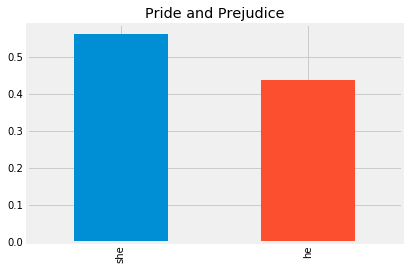

In [76]:
df.pronoun.value_counts("normalize"*100).plot(kind='bar', title='Pride and Prejudice')

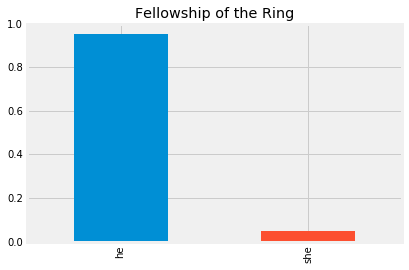

In [77]:
df_tolkein.pronoun.value_counts("normalize"*100).plot(kind='bar', title='Fellowship of the Ring')